In [18]:
import library.dataset_preprocessor as preproc
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [11]:
df = preproc.normalize(preproc.read())
df

,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,VehicleSpeed,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
ind,,,,,,,,,,,,,,,,,,,
0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,0.0,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,33.241504
1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,0.0,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,33.335960
2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,0.0,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,33.429725
3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,0.0,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,33.522769
4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,0.0,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,0.0,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,72.804477
424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,0.0,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,72.889443
425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,0.0,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,72.972854


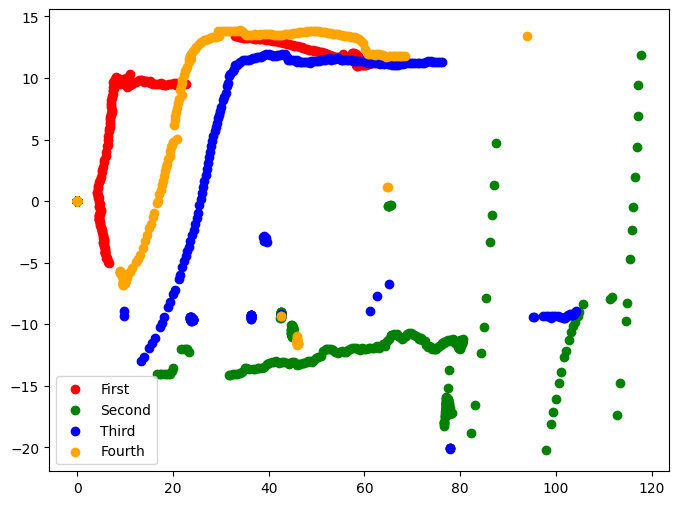

In [45]:


objects = []
for i in range(7):
    if i % 2 == 0:
        obj = df.iloc[:, i:i+2]
        obj.columns = ['x', 'y']
        #obj = obj[obj['y'] != 0] # Filter null
        objects.append(obj)

plt.ion()
plt.figure(figsize=(8, 6))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Interactive Scatter Plot')

object_names = ["First", "Second", "Third", "Fourth"]
color_palette = ["red", "green", "blue", "orange"]

start_point = 200

for i in range(start_point, len(objects[0])):
    plt.clf()
    for obj, col in zip(objects, color_palette):
        plt.scatter(obj["x"][:i], obj["y"][:i], c=col, marker='o')
        plt.legend(object_names)
    display(plt.gcf())
    clear_output(wait=True)
    #time.sleep(0.01)
    
plt.ioff()
plt.show()
